# Lab 7: Importing Data

In [6]:
# install.packages('readxl')
install.packages('tidyverse') 
# readxl is inside tidyverse package, you have no need to install readxl
# if tidyverse is installed. However, since it is not a core tidyverse,
# you need to load readxl explicitly.

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [7]:
library(tidyverse)
library(readxl)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.0     ✔ purrr   1.0.1
✔ tibble  3.1.8     ✔ dplyr   1.1.0
✔ tidyr   1.3.0     ✔ stringr 1.4.1
✔ readr   2.1.3     ✔ forcats 1.0.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter()                   masks stats::filter()
✖ dplyr::lag()                      masks stats::lag()
✖ googlesheets4::request_generate() masks googledrive::request_generate()
✖ googlesheets4::request_make()     masks googledrive::request_make()


## Spreadsheets
In this section, we will learn how to import spreedsheets, which is covered in [Chapter 22 of R4DS](https://r4ds.hadley.nz/spreadsheets.html)

### Overview
In Chapter 8 Data import, we have learned how about importing data from plain txt files, e.g. `.csv` and `.tsv` files. However, we may also need to analyze data from spreadsheets sometimes. We will introduce tools for importing and writing data data from Excel spreadsheets and Google Sheets.

- Excel
    - Reading spreadsheets
    - Writing to Excel
- Google Sheet

#### Reading Spreadsheets

There are some example excel sheets in `readxl` package, you can find the paths by calling `readxl_example()`

In [9]:
readxl_example() # some example excel sheets in readxl package
geometry_path = readxl_example("geometry.xlsx")
geometry_path # show location of the dataset

[1] "clippy.xls"    "clippy.xlsx"   "datasets.xls"  "datasets.xlsx"
 [5] "deaths.xls"    "deaths.xlsx"   "geometry.xls"  "geometry.xlsx"
 [9] "type-me.xls"   "type-me.xlsx"

[1] "/usr/local/lib/R/site-library/readxl/extdata/geometry.xlsx"

- `read_xls()` read Excel files with `xls` format. 
- `read_xlsx()` read Execel files with `xlsx` format. 
- `read_excel()` read Excel files in both format. 
- All three functions will read the file in as tibble.


In [10]:
read_excel(geometry_path)
# equivalent to
# read_excel('/usr/local/lib/R/site-library/readxl/extdata/geometry.xlsx')

B3,C3,D3
<chr>,<chr>,<chr>
B4,C4,D4
B5,C5,D5
B6,C6,D6


You can change column name while reading the Excel file.

In [11]:
read_excel(geometry_path, col_names = c("A", "B", "C"))

A,B,C
<chr>,<chr>,<chr>
B3,C3,D3
B4,C4,D4
B5,C5,D5
B6,C6,D6


In [12]:
deaths_path = readxl_example("deaths.xlsx")
head(read_excel(deaths_path))

New names:
• `` -> `...2`
• `` -> `...3`
• `` -> `...4`
• `` -> `...5`
• `` -> `...6`


Lots of people,...2,...3,...4,...5,...6
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
simply cannot resist writing,NA,NA,NA,NA,some notes
at,the,top,NA,of,their spreadsheets
or,merging,NA,NA,NA,cells
Name,Profession,Age,Has kids,Date of birth,Date of death
David Bowie,musician,69,TRUE,17175,42379
Carrie Fisher,actor,60,TRUE,20749,42731


The output says there are 5 columns unnamed and named automatically.

In [13]:
head(read_excel(deaths_path, 
    col_names = c("Name", "Profession", "Age", "Has kids", "DOB", "DOD")))

Name,Profession,Age,Has kids,DOB,DOD
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
Lots of people,NA,NA,NA,NA,NA
simply cannot resist writing,NA,NA,NA,NA,some notes
at,the,top,NA,of,their spreadsheets
or,merging,NA,NA,NA,cells
Name,Profession,Age,Has kids,Date of birth,Date of death
David Bowie,musician,69,TRUE,17175,42379


If there are multiple worksheets, you can read a single worksheet from a spreadsheet with `sheet` arguemnt. \\
There are 4 worksheets in `datasets.xlsx`: `iris`, `mtcars`, `chickwts`, and `quakes`

In [14]:
head(read_excel(readxl_example('datasets.xlsx')))
head(read_excel(readxl_example('datasets.xlsx'), sheet = 'iris'))
head(read_excel(readxl_example('datasets.xlsx'), sheet = 'mtcars'))

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
<dbl>,<dbl>,<dbl>,<dbl>,<chr>
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa
5.0,3.6,1.4,0.2,setosa
5.4,3.9,1.7,0.4,setosa


Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
<dbl>,<dbl>,<dbl>,<dbl>,<chr>
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa
5.0,3.6,1.4,0.2,setosa
5.4,3.9,1.7,0.4,setosa


mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
21.0,6,160,110,3.90,2.620,16.46,0,1,4,4
21.0,6,160,110,3.90,2.875,17.02,0,1,4,4
22.8,4,108,93,3.85,2.320,18.61,1,1,4,1
21.4,6,258,110,3.08,3.215,19.44,1,0,3,1
18.7,8,360,175,3.15,3.440,17.02,0,0,3,2
18.1,6,225,105,2.76,3.460,20.22,1,0,3,1


The `death` dataset looks messy. Let's clean it up! \\
Let's first take a look at the spreadsheet view of `geom_death.xlsx`.

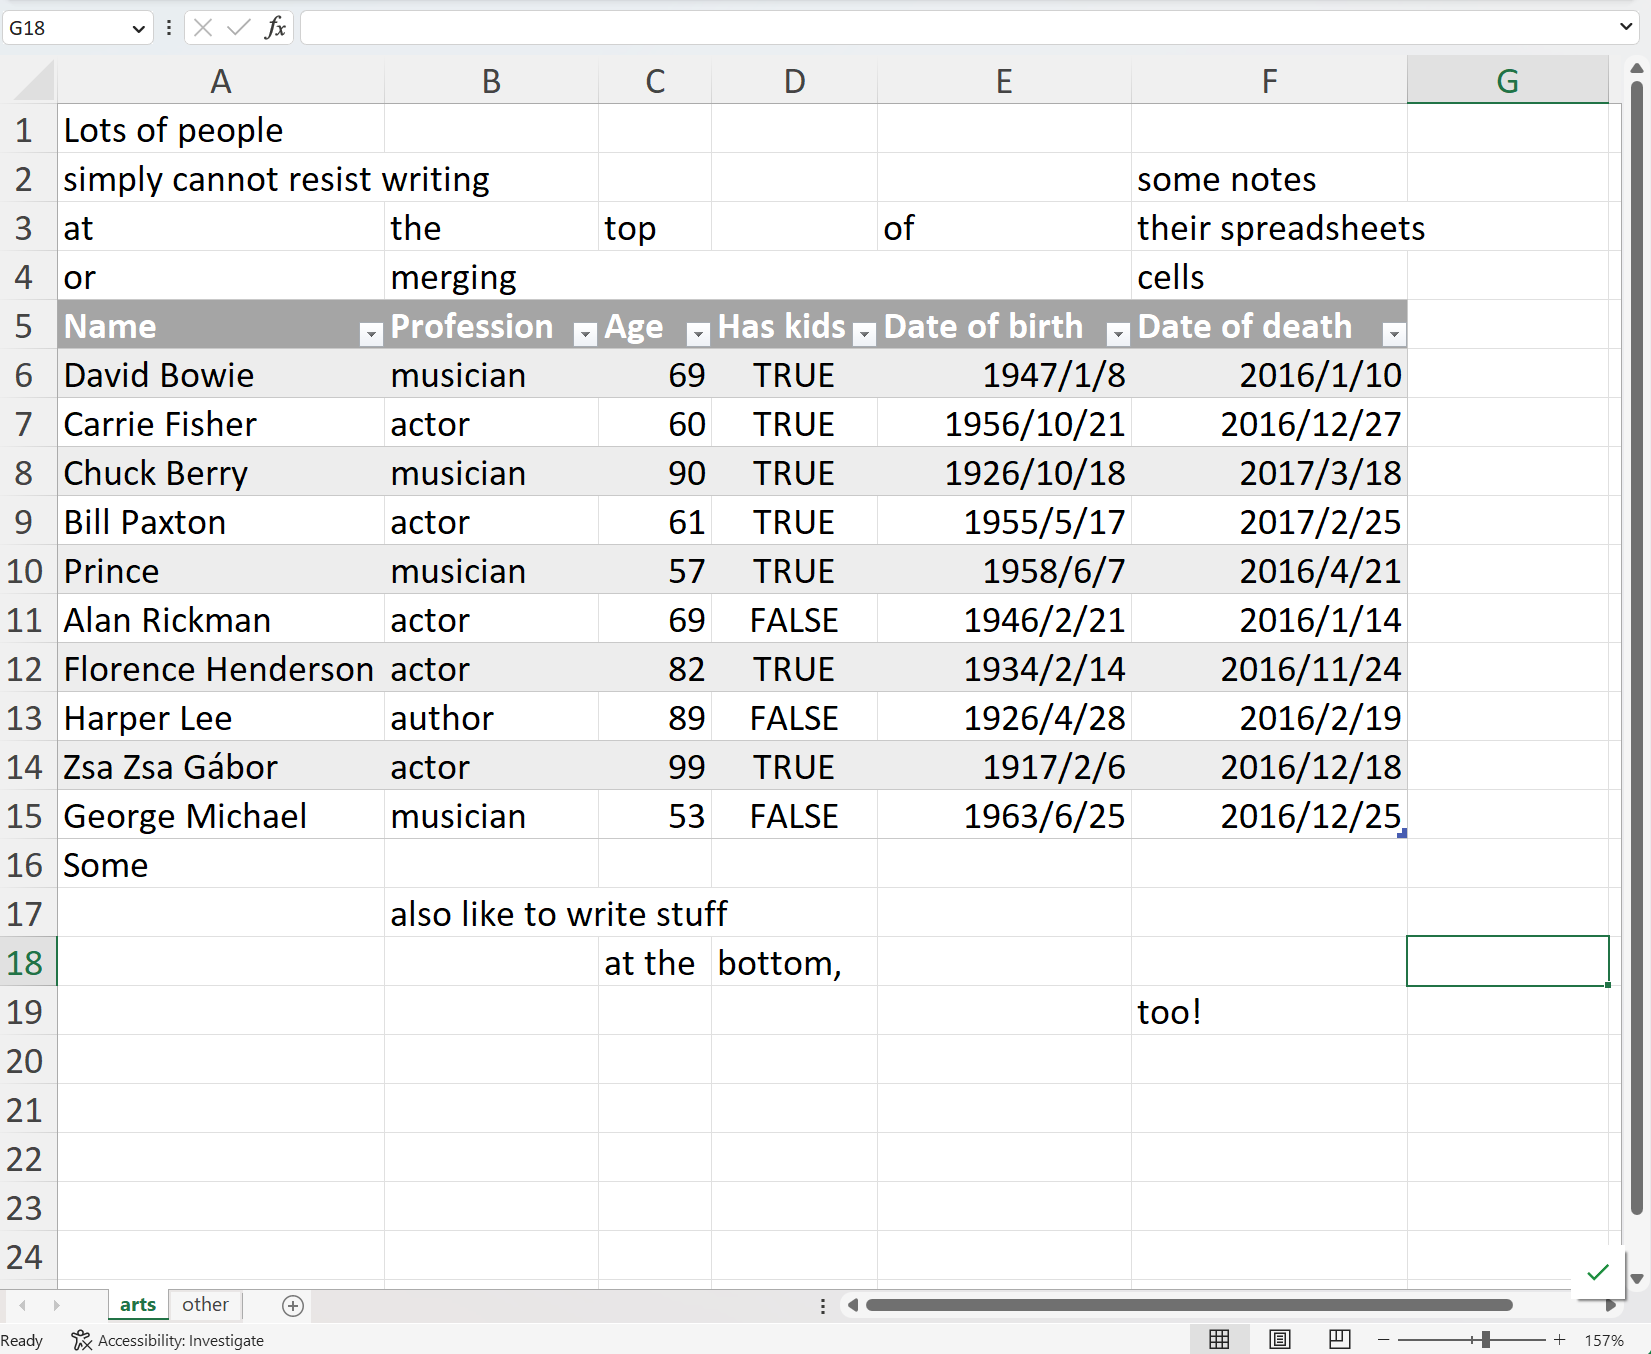


In `read_excel` function, 
- `skip = k` will skip the first `k` rows.
- `n_max = n` will take at most `n` rows.
- `range = "A6:C9"` will read cells from `A6` to `C9`.
- `range = cell_rows(c(a, b))` will read rows from `a` to `b`.
- `range = cell_cols(c(a, b))` will read columns from `a` to `b`.

In [15]:
read_excel(deaths_path, skip = 4, n_max = 10) # skip the first 4 rows and the fifth row turns into column names
read_excel(deaths_path, range = "A6:C9")
read_excel(deaths_path, range = cell_cols(c(2, 3))) # omit NA at first rows

Name,Profession,Age,Has kids,Date of birth,Date of death
<chr>,<chr>,<dbl>,<lgl>,<dttm>,<dttm>
David Bowie,musician,69,TRUE,1947-01-08,2016-01-10
Carrie Fisher,actor,60,TRUE,1956-10-21,2016-12-27
Chuck Berry,musician,90,TRUE,1926-10-18,2017-03-18
Bill Paxton,actor,61,TRUE,1955-05-17,2017-02-25
Prince,musician,57,TRUE,1958-06-07,2016-04-21
Alan Rickman,actor,69,FALSE,1946-02-21,2016-01-14
Florence Henderson,actor,82,TRUE,1934-02-14,2016-11-24
Harper Lee,author,89,FALSE,1926-04-28,2016-02-19
Zsa Zsa Gábor,actor,99,TRUE,1917-02-06,2016-12-18


David Bowie,musician,69
<chr>,<chr>,<dbl>
Carrie Fisher,actor,60
Chuck Berry,musician,90
Bill Paxton,actor,61


the,top
<chr>,<chr>
merging,NA
Profession,Age
musician,69
actor,60
musician,90
actor,61
musician,57
actor,69
actor,82


You may have noticed that, there are different data types in the spreadsheet. In `csv` file, all values are string. In Excel files, a cell can be one of five things:
- A boolean, like TRUE, FALSE, or NA
- A number, like “10” or “10.5”
- A datetime, which can also include time like “11/1/21” or “11/1/21 3:00 PM”
- A text string, like “ten”


##### Some other importing data methods:
The `readr` package in `tidyverse` is used for importing datasets:
- `read_csv()`: comma-separated values (CSV)
- `read_tsv()`: tab-separated values (TSV)
- `read_csv2()`: semicolon-separated values with , as the decimal mark
- `read_delim()`: delimited files (CSV and TSV are important special cases)
- `read_fwf()`: fixed-width files
- `read_table()`: whitespace-separated files
- `read_log()`: web log files

### Writing to Excel

In [16]:
# install.packages('writexl')
library(writexl)

In [18]:
deaths = read_excel(deaths_path, skip = 4, n_max = 10)
write_xlsx(deaths, path="deaths_cleaned.xlsx")

In [19]:
out <- read_xlsx("deaths_cleaned.xlsx")
all.equal(out, deaths)

[1] TRUE

### Google Sheets

In [21]:
library(googlesheets4)
gs4_deauth() # Call `gs4_deauth()` to prevent the attempt to get credentials.
# gs4_auth(email = "mine@example.com") # get credentials to access restricted file. 

`read_sheet()` reads a Google Sheet from a URL or file id. This function is equivalent to `range_read()`

In [23]:
penguins <- read_sheet("https://docs.google.com/spreadsheets/d/1aFu8lnD_g0yjF5O-K6SFgSEWiHPpgvFCF0NY9D6LXnY/edit?usp=sharing")
penguins2 <- read_sheet("1aFu8lnD_g0yjF5O-K6SFgSEWiHPpgvFCF0NY9D6LXnY")
all.equal(penguins, penguins2)
head(penguins)

✔ Reading from penguins.

✔ Range Torgersen Island.

✔ Reading from penguins.

✔ Range Torgersen Island.



[1] TRUE

species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
<chr>,<chr>,<list>,<list>,<list>,<list>,<chr>,<dbl>
Adelie,Torgersen,39.1,18.7,181,3750,male,2007
Adelie,Torgersen,39.5,17.4,186,3800,female,2007
Adelie,Torgersen,40.3,18,195,3250,female,2007
Adelie,Torgersen,NA,NA,NA,NA,NA,2007
Adelie,Torgersen,36.7,19.3,193,3450,female,2007
Adelie,Torgersen,39.3,20.6,190,3650,male,2007


In [24]:
head(range_read("1aFu8lnD_g0yjF5O-K6SFgSEWiHPpgvFCF0NY9D6LXnY"))

✔ Reading from penguins.

✔ Range Torgersen Island.



species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
<chr>,<chr>,<list>,<list>,<list>,<list>,<chr>,<dbl>
Adelie,Torgersen,39.1,18.7,181,3750,male,2007
Adelie,Torgersen,39.5,17.4,186,3800,female,2007
Adelie,Torgersen,40.3,18,195,3250,female,2007
Adelie,Torgersen,NA,NA,NA,NA,NA,2007
Adelie,Torgersen,36.7,19.3,193,3450,female,2007
Adelie,Torgersen,39.3,20.6,190,3650,male,2007


To get a quick view of the meta data of the sheet, use `gs4_get()`

In [25]:
gs4_get("1aFu8lnD_g0yjF5O-K6SFgSEWiHPpgvFCF0NY9D6LXnY")

name,index,id,type,visible,grid_rows,grid_columns,data
<chr>,<int>,<int>,<chr>,<lgl>,<int>,<int>,<list>
Torgersen Island,0,0,GRID,TRUE,1000,26,NULL
Biscoe Island,1,1359818766,GRID,TRUE,1000,26,NULL
Dream Island,2,1114219874,GRID,TRUE,1000,26,NULL


You can obtain a list of all sheets within a Google Sheet with `sheet_names()`.

In [26]:
sheet_names("1aFu8lnD_g0yjF5O-K6SFgSEWiHPpgvFCF0NY9D6LXnY")

[1] "Torgersen Island" "Biscoe Island"    "Dream Island"

Use `sheet` arguement in `read_sheet()` to read different worksheets.

In [27]:
head(read_sheet("1aFu8lnD_g0yjF5O-K6SFgSEWiHPpgvFCF0NY9D6LXnY", sheet="Biscoe Island"))

✔ Reading from penguins.

✔ Range ''Biscoe Island''.



species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
<chr>,<chr>,<list>,<list>,<list>,<list>,<chr>,<dbl>
Adelie,Biscoe,37.8,18.3,174,3400,female,2007
Adelie,Biscoe,37.7,18.7,180,3600,male,2007
Adelie,Biscoe,35.9,19.2,189,3800,female,2007
Adelie,Biscoe,38.2,18.1,185,3950,male,2007
Adelie,Biscoe,38.8,17.2,180,3800,male,2007
Adelie,Biscoe,35.3,18.9,187,3800,female,2007


Use `write_sheet()` to write datasets into Google sheets.It is equivalent to `sheet_write()`.

In [ ]:
write_sheet(penguins, ss = "penguins_save")

### Exercise 1
Read the Google Sheet titled survey from [link](https://docs.google.com/spreadsheets/d/1yc5gL-a2OOBr8M7B3IsDNX5uR17vBHOyWZq6xSTG2G8/edit#gid=0), with `survey_id` as a character variable and `n_pets` as a numerical variable.

*Hint*: [Column Specification](https://googlesheets4.tidyverse.org/reference/range_read.html#column-specification)

In [33]:
#@title Answer to Exercise 1
gs4_get("1yc5gL-a2OOBr8M7B3IsDNX5uR17vBHOyWZq6xSTG2G8")
read_sheet("1yc5gL-a2OOBr8M7B3IsDNX5uR17vBHOyWZq6xSTG2G8", col_types = "cd")

name,index,id,type,visible,grid_rows,grid_columns,data
<chr>,<int>,<int>,<chr>,<lgl>,<int>,<int>,<list>
Sheet1,0,0,GRID,TRUE,7,2,NULL


✔ Reading from survey.

✔ Range Sheet1.

Warning message in .Primitive("as.double")(x, ...):
“NAs introduced by coercion”
Warning message in .Primitive("as.double")(x, ...):
“NAs introduced by coercion”


survey_id,n_pets
<chr>,<dbl>
1,0
2,1
3,NA
4,NA
5,2
6,NA


### Exercise 2
Read the first 6 rows (including column names) from third to fifth columns in worksheet `Dream Island` in Google Sheet file `penguins` using `read_sheet()` with `file_id`: `1aFu8lnD_g0yjF5O-K6SFgSEWiHPpgvFCF0NY9D6LXnY`.

In [37]:
#@title Answer to Exercise 2
read_sheet("1aFu8lnD_g0yjF5O-K6SFgSEWiHPpgvFCF0NY9D6LXnY", range="Dream Island!C1:E6")

✔ Reading from penguins.

✔ Range ''Dream Island'!C1:E6'.



bill_length_mm,bill_depth_mm,flipper_length_mm
<dbl>,<dbl>,<dbl>
39.5,16.7,178
37.2,18.1,178
39.5,17.8,188
40.9,18.9,184
36.4,17.0,195
